In [2]:
import pandas as pd

# Load the uploaded CSV file to inspect its content
file_path = '/content/CitarumWater.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
df.head()


,No,NamaSungai,TitikPantau,Waktu,pH,Temp,TSS,DO,BOD,COD,Nitrat,FecalColiform,Fosfat,O2,IP,Class
0,1,Citarum,Wangisagara,18/04/2018,7.57,25.55°C,11.0,6.11,3.30,6.10,1.08,17000.0,0.043,-,5.12,3
1,2,Citarum,Koyod,18/04/2018,7.69,25.55°C,13.0,6.20,5.31,12.50,1.85,28000.0,0.011,-,5.91,3
2,3,Citarum,Setelah IPAL Cisirung,18/04/2018,7.39,25.55°C,15.0,3.61,7.40,23.50,1.25,90000.0,0.230,-,7.76,3
3,4,Citarum,Nanjung,18/04/2018,7.49,25.55°C,17.0,3.17,8.13,27.50,1.21,300000.0,0.057,-,9.61,3
4,5,Citarum,Outlet Waduk Jatiluhur,18/04/2018,7.17,25.55°C,6.0,6.82,2.89,5.44,1.04,3000.0,0.110,-,2.44,2


In [3]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
import matplotlib.pyplot as plt


In [4]:
# Load dataset
file_path = '/content/CitarumWater.csv'
df = pd.read_csv(file_path)

In [5]:
# Tampilkan beberapa data awal untuk memahami dataset
print(df.head())

# Cek informasi dataset untuk melihat tipe data dan apakah terdapat missing value
df.info()

# Asumsikan bahwa kolom terakhir adalah target (label), dan sisanya adalah fitur
target_column = df.columns[-1]  # Menggunakan kolom terakhir sebagai target secara otomatis

   No NamaSungai             TitikPantau       Waktu    pH     Temp   TSS  \
0   1    Citarum             Wangisagara  18/04/2018  7.57  25.55°C  11.0   
1   2    Citarum                   Koyod  18/04/2018  7.69  25.55°C  13.0   
2   3    Citarum   Setelah IPAL Cisirung  18/04/2018  7.39  25.55°C  15.0   
3   4    Citarum                 Nanjung  18/04/2018  7.49  25.55°C  17.0   
4   5    Citarum  Outlet Waduk Jatiluhur  18/04/2018  7.17  25.55°C   6.0   

     DO   BOD    COD  Nitrat  FecalColiform  Fosfat O2    IP  Class  
0  6.11  3.30   6.10    1.08        17000.0   0.043  -  5.12      3  
1  6.20  5.31  12.50    1.85        28000.0   0.011  -  5.91      3  
2  3.61  7.40  23.50    1.25        90000.0   0.230  -  7.76      3  
3  3.17  8.13  27.50    1.21       300000.0   0.057  -  9.61      3  
4  6.82  2.89   5.44    1.04         3000.0   0.110  -  2.44      2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Colum

In [6]:
# Pisahkan fitur dan target
X = df.drop(columns=[target_column])
y = df[target_column]

# Identifikasi kolom numerik dan kategorikal
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Buat ColumnTransformer untuk melakukan standarisasi pada fitur numerik dan OneHotEncoding pada fitur kategorikal
# handle_unknown='ignore' ditambahkan untuk menangani kategori yang tidak diketahui saat transform
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Bagi dataset menjadi data latih dan data uji (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Lakukan preprocessing pada fitur dan konversi hasilnya menjadi array
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test) # Now this should work without error

In [8]:
# Buat model Logistic Regression
model = LogisticRegression()

In [9]:
# Latih model dengan data latih
model.fit(X_train, y_train)

LogisticRegression()

In [10]:
# Lakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Hitung probabilitas prediksi untuk evaluasi ROC-AUC
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [11]:
# Lakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Hitung probabilitas prediksi untuk evaluasi ROC-AUC
# Change to get probabilities for all classes
y_pred_prob = model.predict_proba(X_test)

# Evaluasi model dengan berbagai metrik
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Changed 'binary' to 'weighted'
recall = recall_score(y_test, y_pred, average='weighted')  # Changed 'binary' to 'weighted'
f1 = f1_score(y_test, y_pred, average='weighted')  # Changed 'binary' to 'weighted'
# Now roc_auc_score should work correctly
roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr') #add multi_class='ovr' for multiclass target

In [12]:
# Tampilkan hasil evaluasi
print(f"Akurasi: {accuracy:.2f}")
print(f"Presisi: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")


Akurasi: 0.96
Presisi: 0.96
Recall: 0.96
F1 Score: 0.96
ROC AUC Score: 1.00


In [13]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[185  11   0   0]
 [  9 285   0   0]
 [  0   1   5   0]
 [  0   0   0   4]]


In [14]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           1       0.95      0.94      0.95       196
           2       0.96      0.97      0.96       294
           3       1.00      0.83      0.91         6
           4       1.00      1.00      1.00         4

    accuracy                           0.96       500
   macro avg       0.98      0.94      0.96       500
weighted avg       0.96      0.96      0.96       500



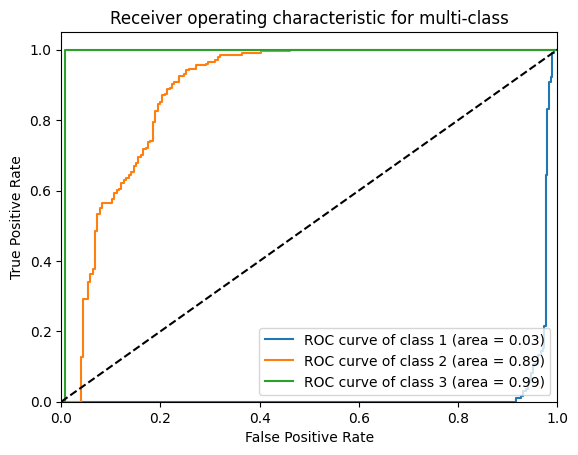

In [15]:
# Import library untuk visualisasi dan evaluasi metrik ROC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
import numpy as np

# Misalkan y_test adalah label sebenarnya dan y_pred_prob adalah probabilitas prediksi dari model
# n_classes menentukan jumlah kelas yang terlibat dalam klasifikasi
n_classes = y_pred_prob.shape[1]  # Mendapatkan jumlah kelas

# Inisialisasi dictionary untuk menyimpan nilai False Positive Rate (FPR), True Positive Rate (TPR), dan AUC
fpr = dict()  # FPR untuk setiap kelas
tpr = dict()  # TPR untuk setiap kelas
roc_auc = dict()  # Nilai AUC untuk setiap kelas

# Loop untuk menghitung ROC curve dan AUC untuk setiap kelas
for i in range(n_classes):
    # Mengecek apakah ada sampel positif untuk kelas i dalam y_test
    if np.sum(y_test == i) > 0:  # Hanya menghitung ROC jika ada sampel positif
        # Menghitung FPR dan TPR untuk kelas ke-i, dengan kelas positif diset sebagai i
        fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_prob[:, i], pos_label=i)

        # Menghitung Area Under Curve (AUC) untuk kelas ke-i
        roc_auc[i] = auc(fpr[i], tpr[i])
    else:
        # Jika tidak ada sampel positif, set fpr, tpr, dan roc_auc ke None atau array kosong
        fpr[i], tpr[i], roc_auc[i] = None, None, None

# Memulai plotting untuk semua ROC curve
plt.figure()

# Loop untuk memplot ROC curve dari setiap kelas
for i in range(n_classes):
    # Memastikan hanya memplot kelas yang valid (yang memiliki fpr dan tpr yang terdefinisi)
    if fpr[i] is not None and tpr[i] is not None:
        # Membuat plot untuk ROC curve dengan label nama kelas dan nilai AUC
        plt.plot(
            fpr[i],
            tpr[i],
            label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
        )

# Membuat garis diagonal sebagai referensi performa acak (random guessing)
plt.plot([0, 1], [0, 1], "k--")

# Mengatur batas sumbu X dan Y
plt.xlim([0.0, 1.0])  # Batas untuk False Positive Rate
plt.ylim([0.0, 1.05])  # Batas untuk True Positive Rate

# Memberi label pada sumbu dan judul plot
plt.xlabel("False Positive Rate")  # Label untuk sumbu X
plt.ylabel("True Positive Rate")   # Label untuk sumbu Y
plt.title("Receiver operating characteristic for multi-class")  # Judul plot

# Menampilkan legenda di sudut kanan bawah
plt.legend(loc="lower right")

# Menampilkan plot ROC curve
plt.show()
